<a href="https://colab.research.google.com/github/kahf10/DeepLearning/blob/main/KahfHussain05_AIT_Deep_learning_Exercise_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Copyright

<PRE>
Copyright (c) 2023 Bálint Gyires-Tóth - All Rights Reserved
You may use and modify this code for research and development purpuses.
Use this code for educational purposes (self-paced or instructor led) without the permission of the author is prohibited.
</PRE>



# California housing prices - modeling
In this notebook we will: 
* using California housing prices data (https://www.kaggle.com/camnugent/california-housing-prices)
* exploring the data
* creating a model
* training the model
* evaluation on test data
* making predictions and regression plot

Exercises: 
* please complete TODO parts


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.datasets import fetch_california_housing

In [8]:
# Keras imports : model, layers, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.callbacks import EarlyStopping

In [9]:
# load California Housing Prices dataset
housing = fetch_california_housing()
X,Y = housing['data'], housing['target']
nb_samples = X.shape[0]

Splitting data into training, validation and test sets:

In [11]:
valid_split = 0.2
test_split  = 0.1

v_point = int(len(X) * (1 - valid_split - test_split))
t_point = int(len(X) * (1 - test_split))

X_train = X[:v_point]
Y_train = Y[:v_point]
X_valid = X[v_point:t_point]
Y_valid = Y[v_point:t_point]
X_test  = X[t_point:]
Y_test  = Y[t_point:]

Standardization of the data:

In [12]:
mean    = np.mean(X_train, axis=0)
std     = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_valid = (X_valid - mean)/std
X_test  = (X_test - mean)/std

Model definition, hints:
* one or two hidden layers and 8-64 neurons / layer
* the hidden layers should have non-linear activation functions
* the input and output layers' sizes are defined by the data
* as the output is continuous, it can be a linear layer

In [14]:
model = Sequential()
model.add(Dense(32, activation = 'tanh', input_shape = (X_train.shape[1],)))
model.add(Dense(32, activation = 'tanh'))
model.add(Dense(1))

Inspect the model summary:

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 32)                288       
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________


Number of trainable parameters in the model: TODO

Compiling the model, hints:
* the loss function has to match the task (regession)
* you should try ADAM and/or SGD optimizer

In [16]:
model.compile(loss='mse', optimizer='adam')

Defining the earlystopping callback function:

In [17]:
es = EarlyStopping(monitor='val_loss',
    min_delta=0,
    patience=5,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0)

Train the model, use training and validation data and apply early stopping:

In [18]:
model.fit(X_train, Y_train, 
                            validation_data=(X_valid,Y_valid),
                            batch_size=128,                             
                            epochs=40, 
                            verbose=1, 
                            callbacks=es)

Epoch 1/40
113/113 [==============================] - 1s 4ms/step - loss: 2.2369 - val_loss: 1.1831
Epoch 2/40
113/113 [==============================] - 0s 2ms/step - loss: 0.5170 - val_loss: 0.8344
Epoch 3/40
113/113 [==============================] - 0s 2ms/step - loss: 0.4586 - val_loss: 0.8162
Epoch 4/40
113/113 [==============================] - 0s 2ms/step - loss: 0.4405 - val_loss: 0.7544
Epoch 5/40
113/113 [==============================] - 0s 2ms/step - loss: 0.4311 - val_loss: 0.7776
Epoch 6/40
113/113 [==============================] - 0s 2ms/step - loss: 0.4241 - val_loss: 0.7594
Epoch 7/40
113/113 [==============================] - 0s 3ms/step - loss: 0.4175 - val_loss: 0.7590
Epoch 8/40
113/113 [==============================] - 0s 4ms/step - loss: 0.4125 - val_loss: 0.7445
Epoch 9/40
113/113 [==============================] - 0s 3ms/step - loss: 0.4069 - val_loss: 0.8240
Epoch 10/40
113/113 [==============================] - 0s 3ms/step - loss: 0.4031 - val_loss: 0.8230

Evaluate the model on the test data:

In [19]:
model.evaluate(X_test, Y_test)

65/65 [==============================] - 0s 2ms/step - loss: 0.3169


0.3169294595718384

Run inference on the test data:

In [20]:
preds = model.predict(X_test)

65/65 [==============================] - 0s 2ms/step


Inspect the result on a regression plot:

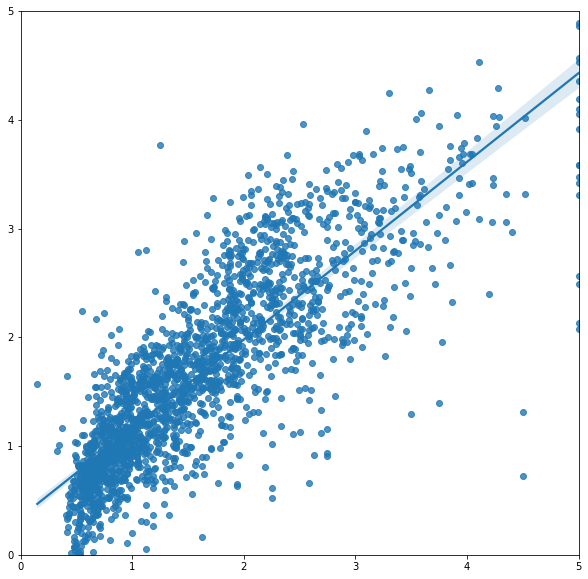

In [21]:
plt.figure(figsize=(10,10))
sns.regplot(x=Y_test.reshape(-1), y=preds.reshape(-1)).set(xlim=(0,5),ylim=(0,5)); 